# PyTorch Implementation of Night to Day Image conversion

### Imports

In [1]:
import torch
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms as T
from model import Generator_Resnet

In [2]:
def get_transforms():
    tfms = [
        T.ToTensor(),
        T.Resize((300, 300))
    ]
    return tfms

transform = T.Compose(get_transforms())

### INPUT : Image of Dimension 300 x 300

In [3]:
in_img = Image.open('./night_test.jpg') # change the path to the input image
in_img = torch.reshape(transform(in_img), (1, 3, 300, 300))

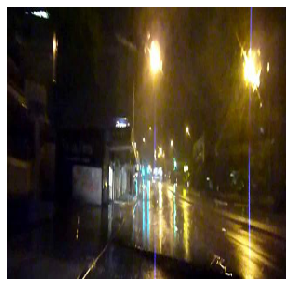

In [9]:
_, ax = plt.subplots(figsize=(5, 5))
ax.axis("off")
ax.imshow(np.array(in_img).reshape(3, 300, 300).transpose(1, 2, 0), aspect="auto", interpolation="nearest")

### Model : Cycle Generative Adversarial Networks ( GAN ) with MSE and L1 loss

In [5]:
Gen_Night2Day = Generator_Resnet((3, 300, 300), 4)
Gen_Night2Day.load_state_dict(torch.load("./G_AB.pth", map_location=torch.device("cpu")))

<All keys matched successfully>

### Output : Image of Dimension 300 x 300

In [6]:
out_img = Gen_Night2Day(in_img).detach().numpy().reshape((3, 300, 300)).transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


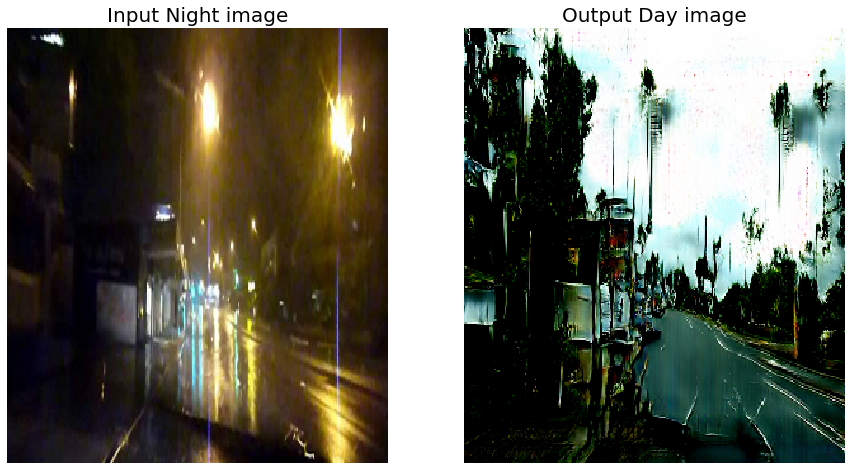

In [8]:
_, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title("Input Night image", fontsize=20)
ax[1].set_title("Output Day image", fontsize=20)
ax[0].imshow(np.array(in_img).reshape(3, 300, 300).transpose(1, 2, 0), aspect="auto", interpolation="nearest")
ax[1].imshow(out_img, interpolation="nearest", aspect="auto")